## Project: Speech Recognition with Neural Networks

---
## Introduction  

In this notebook, we will build a deep neural network that functions as part of an end-to-end automatic speech recognition (ASR) pipeline!  The completed pipeline will accept raw audio as input and return a predicted transcription of the spoken language.  The full pipeline is summarized in the figure below.



- **STEP 1** is a pre-processing step that converts raw audio to one of two feature representations that are commonly used for ASR. 
- **STEP 2** is an acoustic model which accepts audio features as input and returns a probability distribution over all potential transcriptions.
- **STEP 3** in the pipeline takes the output from the acoustic model and returns a predicted transcription.  

## The Data

We begin by investigating the dataset that will be used to train and evaluate the pipeline.  [LibriSpeech](http://www.danielpovey.com/files/2015_icassp_librispeech.pdf) is a large corpus of English-read speech, designed for training and evaluating models for ASR.  The dataset contains 1000 hours of speech derived from audiobooks.  We will work with a small subset in this project, since larger-scale data would take a long while to train.

In the code cells below, we will use the `vis_train_features` module to visualize a training example. The returned variables are:
- `vis_text` - transcribed text (label) for the training example.
- `vis_raw_audio` - raw audio waveform for the training example.
- `vis_mfcc_feature` - mel-frequency cepstral coefficients (MFCCs) for the training example.
- `vis_spectrogram_feature` - spectrogram for the training example. 
- `vis_audio_path` - the file path to the training example.

In [ ]:
!sudo apt-get install ffmpeg
!wget http://launchpadlibrarian.net/348889634/libav-tools_3.4.1-1_all.deb
!sudo dpkg -i libav-tools_3.4.1-1_all.deb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
--2020-08-11 14:00:51--  http://launchpadlibrarian.net/348889634/libav-tools_3.4.1-1_all.deb
Resolving launchpadlibrarian.net (launchpadlibrarian.net)... 91.189.89.228, 91.189.89.229, 2001:67c:1560:8003::8008, ...
Connecting to launchpadlibrarian.net (launchpadlibrarian.net)|91.189.89.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15844 (15K) [application/x-debian-package]
Saving to: ‘libav-tools_3.4.1-1_all.deb’

libav-tools_3.4.1-1 100%[===================>]  15.47K  --.-KB/s    in 0.1s    

2020-08-11 14:00:52 (114 KB/s) - ‘libav-tools_3.4.1-1_all.deb’ saved [15844/15844]

Selecting previously unselec

In [ ]:
!wget http://www.openslr.org/resources/12/dev-clean.tar.gz
!tar -xzvf dev-clean.tar.gz
!wget http://www.openslr.org/resources/12/test-clean.tar.gz
!tar -xzvf test-clean.tar.gz
!mv flac_to_wav.sh LibriSpeech
%cd LibriSpeech
!./flac_to_wav.sh

Streaming output truncated to the last 5000 lines.
LibriSpeech/dev-clean/6345/93302/6345-93302-0013.flac
LibriSpeech/dev-clean/6345/93302/6345-93302-0004.flac
LibriSpeech/dev-clean/6345/93302/6345-93302-0011.flac
LibriSpeech/dev-clean/6345/93302/6345-93302-0007.flac
LibriSpeech/dev-clean/6345/93302/6345-93302-0024.flac
LibriSpeech/dev-clean/6345/93306/
LibriSpeech/dev-clean/6345/93306/6345-93306-0016.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0014.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0000.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0022.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0007.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0002.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0006.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0012.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0005.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0001.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0019.flac
LibriSpeech/dev-clean/6345/93306/6345-93306-0020.fl

In [ ]:
!chmod +x flac_to_wav.sh
!./flac_to_wav.sh

Streaming output truncated to the last 5000 lines.
  Metadata:
    ISFT            : Lavf57.83.100
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 16000 Hz, mono, s16, 256 kb/s
    Metadata:
      encoder         : Lavc57.107.100 pcm_s16le
size=     194kB time=00:00:06.21 bitrate= 256.1kbits/s speed=2.04e+03x    
video:0kB audio:194kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.039251%
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable

In [ ]:
%cd ..
!python create_desc_json.py LibriSpeech/dev-clean/ train_corpus.json
!python create_desc_json.py LibriSpeech/test-clean/ valid_corpus.json

/content/drive/My Drive/SpeechRecognition


In [ ]:
!pip install python_speech_features
!pip install SoundFile

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=9e30dac3b39bdb8395c8d9e645e4e8c05c95baa5a4f88cba72a4e0217498f88c
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
from data_generator import vis_train_features

# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 2136 total training examples.


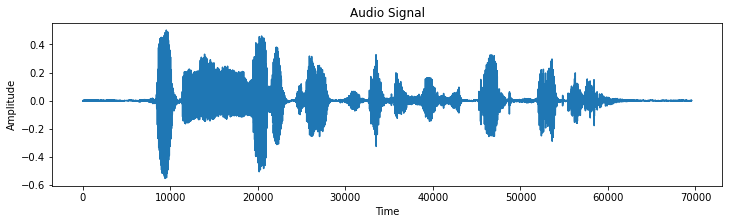

**Shape of Audio Signal** : (69568,)

**Transcript** : ferdinand meditates over his good fortune

In [ ]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

## STEP 1: Acoustic Features for Speech Recognition

For this project, we won't use the raw audio waveform as input to the model.  Instead, we first performs a pre-processing step to convert the raw audio to a feature representation that has historically proven successful for ASR models.  The acoustic model will accept the feature representation as input.

In this project, you will explore two possible feature representations.

### Spectrograms

The first option for an audio feature representation is the [spectrogram](https://www.youtube.com/watch?v=_FatxGN3vAM). The implementation appears in the `utils.py` file in your repository.

The code returns the spectrogram as a 2D tensor, where the first (_vertical_) dimension indexes time, and the second (_horizontal_) dimension indexes frequency.  To speed the convergence of the algorithm, we have also normalized the spectrogram.  (we can see this quickly in the visualization below by noting that the mean value hovers around zero, and most entries in the tensor assume values close to zero.)

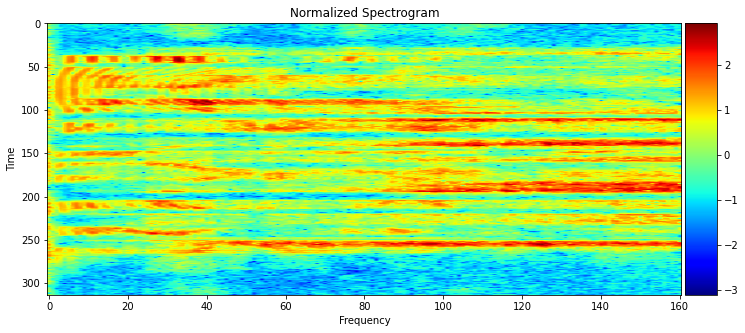

**Shape of Spectrogram** : (314, 161)

In [ ]:
from data_generator import plot_spectrogram_feature

# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

### Mel-Frequency Cepstral Coefficients (MFCCs)

The second option for an audio feature representation is [MFCCs](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum).  Just as with the spectrogram features, the MFCCs are normalized in the supplied code.

The main idea behind MFCC features is the same as spectrogram features: at each time window, the MFCC feature yields a feature vector that characterizes the sound within the window.  Note that the MFCC feature is much lower-dimensional than the spectrogram feature, which could help an acoustic model to avoid overfitting to the training dataset. 

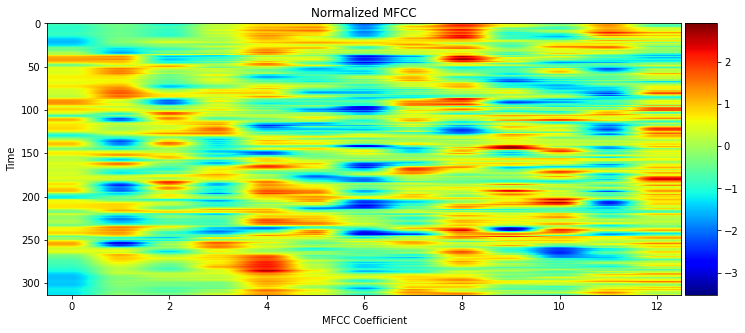

**Shape of MFCC** : (314, 13)

In [ ]:
from data_generator import plot_mfcc_feature

# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

## STEP 2: Deep Neural Networks for Acoustic Modeling

In this section, we will experiment with various neural network architectures for acoustic modeling.  

we will begin by training five relatively simple architectures.  

All models will be specified in the `sample_models.py` file. 

In [ ]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf 
# import NN architectures for speech recognition
from sample_models import *
# import function for training acoustic model
from train_utils import train_model

### Model 0: RNN

Given their effectiveness in modeling sequential data, the first acoustic model we will use is an RNN.

At each time step, the speaker pronounces one of 28 possible characters, including each of the 26 letters in the English alphabet, along with a space character (" "), and an apostrophe (').

The output of the RNN at each time step is a vector of probabilities with 29 entries, where the $i$-th entry encodes the probability that the $i$-th character is spoken in the time sequence.  (The extra 29th character is an empty "character" used to pad training examples within batches containing uneven lengths.) 

In [ ]:
model_0 = simple_rnn_model(input_dim=161) # change to 13 if you would like to use MFCC features

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
rnn (GRU)                    (None, None, 29)          16704     
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_model(input_to_softmax=model_0, 
                pickle_path='model_0.pickle', 
                save_model_path='model_0.h5',
                spectrogram=True) # change to False if you would like to use MFCC features

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/20
106/106 [==============================] - 889s 8s/step - loss: 790.0341 - val_loss: 727.1414
Epoch 2/20
106/106 [==============================] - 51s 483ms/step - loss: 752.1856 - val_loss: 726.2991
Epoch 3/20
106/106 [==============================] - 46s 433ms/step - loss: 752.3763 - val_loss: 726.6331
Epoch 4/20
106/106 [==============================] - 47s 444ms/step - loss: 752.0210 - val_loss: 726.1790
Epoch 5/20
106/106 [==============================] - 47s 439ms/step - loss: 752.6602 - val_loss: 728.6238
Epoch 6/20
106/106 [==============================] - 46s 435ms/step - loss: 751.9125 - val_loss: 722.7918
Epoch 7/20
106/106 [==============================] - 46s 438ms/step - loss: 752.0021 - val_loss: 729.0278
Epoch 8/20
106/106 [==============================] - 46s 435ms/step - loss: 752.0488 - val_loss: 722.3107
Epoch 9/20
106/106 [==============================] - 46s 437ms/step - loss: 751.7388 - val_loss: 727.5047
Epoch 10/20
106/106 [==================

<a id='model1'></a>
### Model 1: RNN + TimeDistributed Dense

In this architecture, we will add `batch normalization` to the recurrent layer to reduce training times.  The `TimeDistributed` layer will be used to find more complex patterns in the dataset.  

- The first layer of the neural network is a `GRU` that takes the time sequence of audio features as input.  
- The output of GRU is fed into a `batch normalization` layer whose output is then fed into `TimeDistributed` to apply a `Dense` layer to each of the time steps in the RNN output. 

In [ ]:
model_1 = rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                    units=200,
                    activation='relu')

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
rnn (GRU)                    (None, None, 200)         217800    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 200)         800       
_________________________________________________________________
time_distributed_21 (TimeDis (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 224,429
Trainable params: 224,029
Non-trainable params: 400
_________________________________________________________________
None


After the model has finished training, the model is saved in the HDF5 file `model_1.h5`.  The loss history is saved in `model_1.pickle`. 

In [ ]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_1.pickle', 
            save_model_path='model_1.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

Epoch 1/20
106/106 [==============================] - 170s 2s/step - loss: nan - val_loss: nan
Epoch 2/20
106/106 [==============================] - 168s 2s/step - loss: nan - val_loss: nan
Epoch 3/20
106/106 [==============================] - 166s 2s/step - loss: nan - val_loss: nan
Epoch 4/20
106/106 [==============================] - 167s 2s/step - loss: nan - val_loss: nan
Epoch 5/20
106/106 [==============================] - 166s 2s/step - loss: nan - val_loss: nan
Epoch 6/20
106/106 [==============================] - 165s 2s/step - loss: nan - val_loss: nan
Epoch 7/20
106/106 [==============================] - 165s 2s/step - loss: nan - val_loss: nan
Epoch 8/20
106/106 [==============================] - 167s 2s/step - loss: nan - val_loss: nan
Epoch 9/20
106/106 [==============================] - 163s 2s/step - loss: nan - val_loss: nan
Epoch 10/20
106/106 [==============================] - 163s 2s/step - loss: nan - val_loss: nan
Epoch 11/20
106/106 [============================

###  Model 2: CNN + RNN + TimeDistributed Dense

The architecture in `cnn_rnn_model` adds an additional level of complexity, by introducing a `1D convolution layer`.


This layer incorporates many arguments that can be (optionally) tuned when calling the `cnn_rnn_model` module.  


In [ ]:
model_2 = cnn_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=200)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         354400    
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
rnn (SimpleRNN)              (None, None, 200)         80200     
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 200)         800       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)        

After the model has finished training, the model is saved in the HDF5 file `model_2.h5`.  The loss history is saved in `model_2.pickle`. 

In [ ]:
train_model(input_to_softmax=model_2, 
                pickle_path='model_2.pickle', 
                save_model_path='model_2.h5', 
                spectrogram=True) # change to False if you would like to use MFCC features

Epoch 1/20
106/106 [==============================] - 52s 495ms/step - loss: 223.8228 - val_loss: 220.3607
Epoch 2/20
106/106 [==============================] - 52s 489ms/step - loss: 165.2172 - val_loss: 157.4251
Epoch 3/20
106/106 [==============================] - 52s 491ms/step - loss: 145.4991 - val_loss: 144.0386
Epoch 4/20
106/106 [==============================] - 52s 493ms/step - loss: 135.2819 - val_loss: 138.5602
Epoch 5/20
106/106 [==============================] - 52s 489ms/step - loss: 128.1334 - val_loss: 136.3536
Epoch 6/20
106/106 [==============================] - 52s 494ms/step - loss: 123.1009 - val_loss: 134.1929
Epoch 7/20
106/106 [==============================] - 52s 488ms/step - loss: 118.7646 - val_loss: 132.2951
Epoch 8/20
106/106 [==============================] - 52s 488ms/step - loss: 114.9018 - val_loss: 129.1523
Epoch 9/20
106/106 [==============================] - 52s 488ms/step - loss: 111.8700 - val_loss: 130.6503
Epoch 10/20
106/106 [================

###  Model 3: Deeper RNN + TimeDistributed Dense

The architecture in `deep_rnn_model` utilizes a variable number `recur_layers` of recurrent layers. 


In [ ]:
model_3 = deep_rnn_model(input_dim=13, # change to 13 if you would like to use MFCC features
                         units=200,
                         recur_layers=2) 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
deeprnn1 (GRU)               (None, None, 200)         129000    
_________________________________________________________________
deeprnnBN1 (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
deeprnn2 (GRU)               (None, None, 200)         241200    
_________________________________________________________________
deeprnnBN2 (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)         

After the model has finished training, the model is saved in the HDF5 file `model_3.h5`.  The loss history is saved in `model_3.pickle`.

In [ ]:
train_model(input_to_softmax=model_3, 
                pickle_path='model_3.pickle', 
                save_model_path='model_3.h5', 
                spectrogram=False,minibatch_size=64)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
33/33 [==============================] - 173s 5s/step - loss: 334.1935 - val_loss: 244.9969
Epoch 2/20
33/33 [==============================] - 175s 5s/step - loss: 223.0699 - val_loss: 226.8300
Epoch 3/20
33/33 [==============================] - 175s 5s/step - loss: 195.8165 - val_loss: 237.7187
Epoch 4/20
33/33 [==============================] - 175s 5s/step - loss: 175.0406 - val_loss: 190.3417
Epoch 5/20
33/33 [==============================] - 179s 5s/step - loss: 158.3568 - val_loss: 194.8686
Epoch 6/20
33/33 [==============================] - 178s 5s/step - loss: 143.7513 - val_loss: 155.5531
Epoch 7/20
33/33 [==============================] - 178s 5s/step - loss: 135.2477 - val_loss: 147.4769
Epoch 8/20
33/33 [==============================] - 177s 5s/step - loss: 127.8222 - val_loss: 138.2208
Epoch 9/20
33/33 [==============================] - 177s 5s/step - loss: 123.9266 - val_loss: 138.17

### Model 4: Bidirectional RNN + TimeDistributed Dense

In this architecture, we will specify an architecture that uses a single bidirectional RNN layer, before a (`TimeDistributed`) dense layer. 

> One shortcoming of conventional RNNs is that they are only able to make use of previous context. In speech recognition, where whole utterances are transcribed at once, there is no reason not to exploit future context as well.  Bidirectional RNNs (BRNNs) do this by processing the data in both directions with two separate hidden layers which are then fed forwards to the same output layer.


In [ ]:
model_4 = bidirectional_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                                  units=200)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 400)         435600    
_________________________________________________________________
bidir_rnn_BN (BatchNormaliza (None, None, 400)         1600      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 29)          11629     
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 448,829
Trainable params: 448,029
Non-trainable params: 800
_________________________________________________________________
None


 After the model has finished training, the model is saved in the HDF5 file `model_4.h5`.  The loss history is saved in `model_4.pickle`.

In [ ]:
train_model(input_to_softmax=model_4, 
                pickle_path='model_4.pickle', 
                save_model_path='model_4.h5', 
                spectrogram=True,minibatch_size=64)

Epoch 1/20
33/33 [==============================] - 121s 4s/step - loss: 341.7368 - val_loss: 238.3475
Epoch 2/20
33/33 [==============================] - 122s 4s/step - loss: 232.1987 - val_loss: 220.6273
Epoch 3/20
33/33 [==============================] - 121s 4s/step - loss: 210.3819 - val_loss: 192.6627
Epoch 4/20
33/33 [==============================] - 121s 4s/step - loss: 186.0812 - val_loss: 178.6136
Epoch 5/20
33/33 [==============================] - 121s 4s/step - loss: 168.7401 - val_loss: 176.1316
Epoch 6/20
33/33 [==============================] - 121s 4s/step - loss: 156.9885 - val_loss: 166.4176
Epoch 7/20
33/33 [==============================] - 123s 4s/step - loss: 147.1692 - val_loss: 156.8573
Epoch 8/20
33/33 [==============================] - 121s 4s/step - loss: 139.6471 - val_loss: 148.6249
Epoch 9/20
33/33 [==============================] - 120s 4s/step - loss: 133.2563 - val_loss: 143.6079
Epoch 10/20
33/33 [==============================] - 121s 4s/step - loss:

### Compare the Models

The training and validation loss are plotted for each model.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


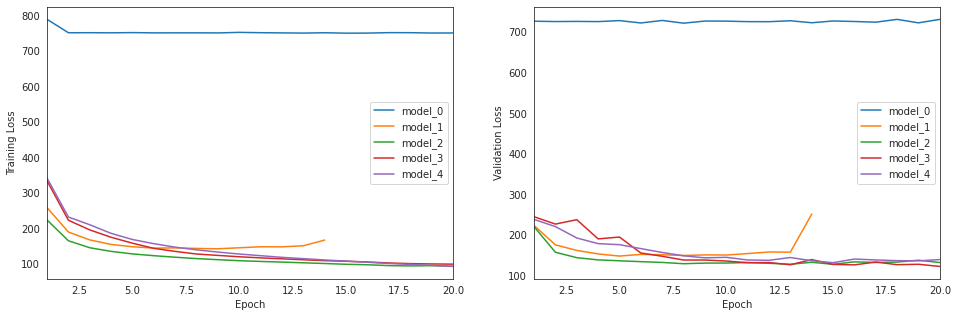

In [ ]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

# obtain the paths for the saved model history
all_pickles = sorted(glob("results/*.pickle"))
# extract the name of each model
model_names = [item[8:-7] for item in all_pickles]
# extract the loss history for each model
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
# save the number of epochs used to train each model
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

# plot the training loss vs. epoch for each model
ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

__Performance Analysis of above architectures:__  

__model_0__: This is just a simple model with a single layer of rnn, so it doesn't converge and since both its training and validation loss are high and close to each other so the model is underfitting and is unable to learn. The reason this is happenning is because it is a very simple model with only 16,617 parameters.

__model_1__: In this model we added TimeDistributed Dense layer which significantly improved the number of parameters to 223,829 so the model was able to learn from the data which is why this model is performing much better than the simple model. However the difference between the training loss and validation loss is big which suggests that the model is overfitting.

__model_2__: Adding a CNN layer improved the model's performance on training data and it's loss is lowest so far on training data, however on validation data it started to perfrom well but half way throug the validation loss started to increase which means that the model is overfitting.

__model_3__: This is a significantly bigger model so it performs better however the CNN layer is missing which is why it is overfitting, It started off pretty well since both the training and validation loss were close and were decreasing but then later on validation loss started to lag behind which overfit the model.

__model_4__: Using bidirectional model performs better than simple RNN but it's performance is bad as compared to model_2 which uses CNN. Also this model is overfitting.

### Final Model

- our final model utilizes multiple Bidirectional layers along with a TimeDistributed Dense layer.

In [ ]:
model_end = final_model(input_dim=13, # change to 13 if you would like to use MFCC features
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='same',
                        units=200)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, None, 400)         258000    
_________________________________________________________________
bidir_rnn_BN1 (BatchNormaliz (None, None, 400)         1600      
_________________________________________________________________
bidirectional_13 (Bidirectio (None, None, 400)         722400    
_________________________________________________________________
bidir_rnn_BN2 (BatchNormaliz (None, None, 400)         1600      
_________________________________________________________________
bidirectional_14 (Bidirectio (None, None, 400)         722400    
_________________________________________________________________
bidir_rnn_BN3 (BatchNormaliz (None, None, 400)        

After the model has finished training, the model is saved in the HDF5 file `model_end.h5`.  The loss history is saved in `model_end.pickle`.

In [ ]:
train_model(input_to_softmax=model_end, 
                pickle_path='model_end.pickle', 
                save_model_path='model_end.h5', 
                spectrogram=False,minibatch_size=64)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
33/33 [==============================] - 580s 18s/step - loss: 306.0518 - val_loss: 251.1926
Epoch 2/20
33/33 [==============================] - 581s 18s/step - loss: 229.0779 - val_loss: 213.7601
Epoch 3/20
33/33 [==============================] - 570s 17s/step - loss: 221.3345 - val_loss: 240.6714
Epoch 4/20
33/33 [==============================] - 571s 17s/step - loss: 213.5206 - val_loss: 208.8437
Epoch 5/20
33/33 [==============================] - 573s 17s/step - loss: 204.3969 - val_loss: 197.6447
Epoch 6/20
33/33 [==============================] - 571s 17s/step - loss: 188.3235 - val_loss: 198.7135
Epoch 7/20
33/33 [==============================] - 570s 17s/step - loss: 163.9728 - val_loss: 167.0838
Epoch 8/20
33/33 [==============================] - 575s 17s/step - loss: 137.4669 - val_loss: 143.7397
Epoch 9/20
33/33 [==============================] - 580s 18s/step - loss: 120.5293 - val_los

## STEP 3: Obtain Predictions

In [ ]:
import numpy as np
from data_generator import AudioGenerator
from keras import backend as K
from utils import int_sequence_to_text
from IPython.display import Audio

def get_predictions(index, partition, input_to_softmax, model_path):
    """ Print a model's decoded predictions
    Params:
        index (int): The example you would like to visualize
        partition (str): One of 'train' or 'validation'
        input_to_softmax (Model): The acoustic model
        model_path (str): Path to saved acoustic model's weights
    """
    # load the train and test data
    data_gen = AudioGenerator(spectrogram=False)
    data_gen.load_train_data()
    data_gen.load_validation_data()
    
    # obtain the true transcription and the audio features 
    if partition == 'validation':
        transcr = data_gen.valid_texts[index]
        audio_path = data_gen.valid_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    elif partition == 'train':
        transcr = data_gen.train_texts[index]
        audio_path = data_gen.train_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    else:
        raise Exception('Invalid partition!  Must be "train" or "validation"')
        
    # obtain and decode the acoustic model's predictions
    input_to_softmax.load_weights(model_path)
    prediction = input_to_softmax.predict(np.expand_dims(data_point, axis=0))
    output_length = [input_to_softmax.output_length(data_point.shape[0])] 
    pred_ints = (K.eval(K.ctc_decode(
                prediction, output_length)[0][0])+1).flatten().tolist()
    
    # play the audio file, and display the true and predicted transcriptions
    print('-'*80)
    Audio(audio_path)
    print('True transcription:\n' + '\n' + transcr)
    print('-'*80)
    print('Predicted transcription:\n' + '\n' + ''.join(int_sequence_to_text(pred_ints)))
    print('-'*80)

In [ ]:
get_predictions(index=0, 
                partition='train',
                input_to_softmax=final_model(input_dim=13, # change to 13 if you would like to use MFCC features
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='same',
                        units=200), 
                model_path='results/model_end.h5')

Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
bidirectional_60 (Bidirectio (None, None, 400)         258000    
_________________________________________________________________
bidir_rnn_BN1 (BatchNormaliz (None, None, 400)         1600      
_________________________________________________________________
bidirectional_61 (Bidirectio (None, None, 400)         722400    
_________________________________________________________________
bidir_rnn_BN2 (BatchNormaliz (None, None, 400)         1600      
_________________________________________________________________
bidirectional_62 (Bidirectio (None, None, 400)         722400    
_________________________________________________________________
bidir_rnn_BN3 (BatchNormaliz (None, None, 400)       

In [ ]:

get_predictions(index=1089, 
                partition='validation',
                input_to_softmax=final_model(input_dim = 13,
                       filters = 200,
                       kernel_size = 11,
                       conv_stride = 2,
                       conv_border_mode='same',
                        units=200), 
                model_path='results/model_end.h5')

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
bidirectional_57 (Bidirectio (None, None, 400)         258000    
_________________________________________________________________
bidir_rnn_BN1 (BatchNormaliz (None, None, 400)         1600      
_________________________________________________________________
bidirectional_58 (Bidirectio (None, None, 400)         722400    
_________________________________________________________________
bidir_rnn_BN2 (BatchNormaliz (None, None, 400)         1600      
_________________________________________________________________
bidirectional_59 (Bidirectio (None, None, 400)         722400    
_________________________________________________________________
bidir_rnn_BN3 (BatchNormaliz (None, None, 400)       